# **Next_word_prediction_using_LSTM**



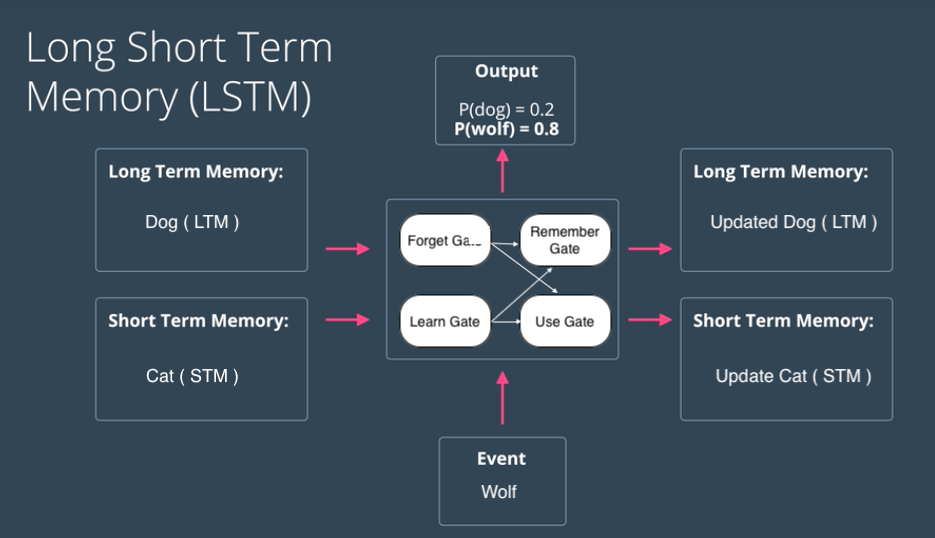

In [ ]:
#load data
#basic NLP preprocessing
#convert to integer using keras tokenizer
#make x and y by making firt word in the corpus as x and teh second as y
#make one hot encoding of y over all the vocabulay size
#use ebddings and build RNN or LSTM

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
video = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
! mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          17089        367  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           9287        234  1.0              
victorahaji/worlds-air-quality-and-water-pollution-dataset  World's Air Quality and Water Pollution Dataset     58KB  2023-10-30 12:37:47           1282         30  0.9411765        
amirmahdiabbootalebi/salary-by-job-title-and-country        Salary by Job Title and C

Go to Kaggle-

https://www.kaggle.com/code/ishaqkhattak/next-word-prediction-using-lstm/output

Go to the Data
https://www.kaggle.com/datasets/imbikramsaha/poems/data



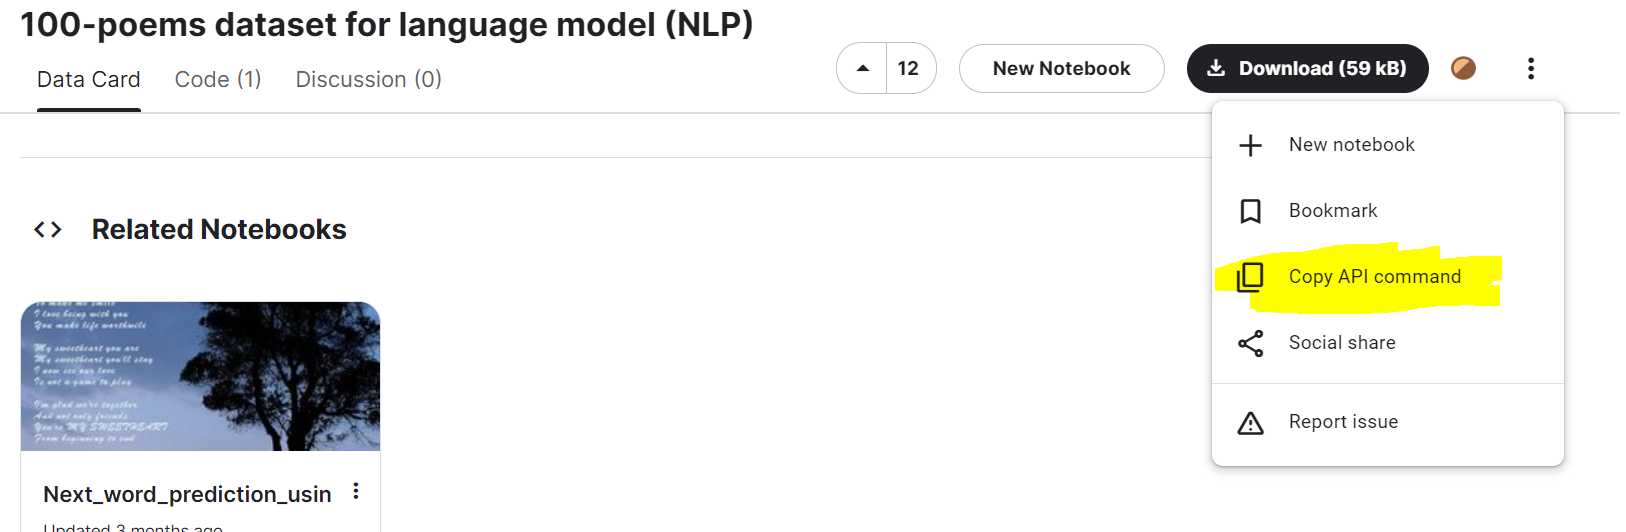

In [ ]:
!kaggle datasets download -d imbikramsaha/poems

  0% 0.00/57.6k [00:00<?, ?B/s]
100% 57.6k/57.6k [00:00<00:00, 89.8MB/s]


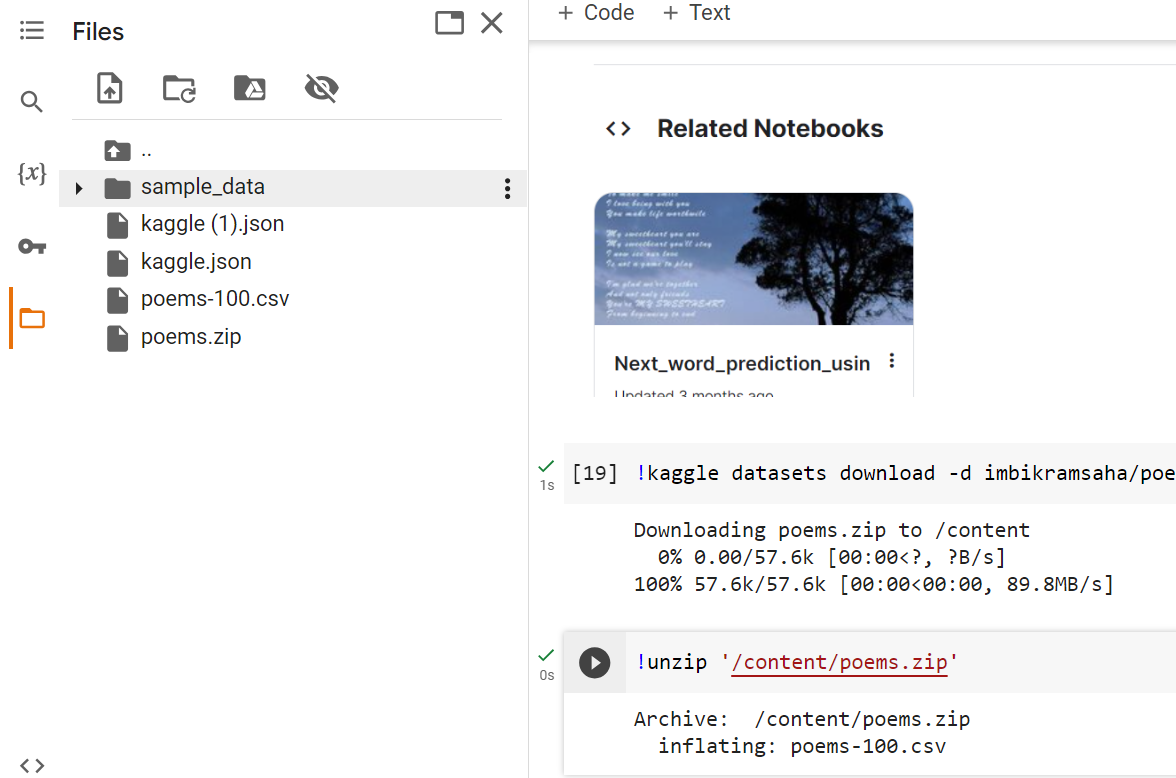


tHIS IS ALSO A  WAY TO DIRECTLY USE FROM KAGGLE

In [ ]:
!unzip '/content/poems.zip'

Archive:  /content/poems.zip
  inflating: poems-100.csv           


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/poems-100.csv')

In [ ]:
df

,text
0,"O my Luve's like a red, red rose\nThat’s newly..."
1,"The rose is red,\nThe violet's blue,\nSugar is..."
2,How do I love thee? Let me count the ways.\nI ...
3,"Had I the heavens' embroidered cloths,\nEnwrou..."
4,"I.\n Enough! we're tired, my heart and I.\n..."
...,...
95,The city had withdrawn into itself\nAnd left a...
96,O gift of God! O perfect day:\n Whereon...
97,"The world is too much with us; late and soon,\..."
98,To him who in the love of Nature holds\nCo...


#preprocessing

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
import re
import emoji
def clean(text):
  text = text.lower()
  text = re.sub(r'[^\s\w]','',text)
  text = re.sub(r'https?://\S+','',text) #remove links
  text = re.sub(r'[^A-Za-z0-9 ]+', '', text) #remove special character
  text = emoji.demojize(text, delimiters=('', ''))
  return text

In [ ]:
df['text'] = df['text'].apply(clean)

In [ ]:
df

,text
0,o my luves like a red red rosethats newly spru...
1,the rose is redthe violets bluesugar is sweeta...
2,how do i love thee let me count the waysi love...
3,had i the heavens embroidered clothsenwrought ...
4,i enough were tired my heart and i we si...
...,...
95,the city had withdrawn into itselfand left at ...
96,o gift of god o perfect day whereon sha...
97,the world is too much with us late and soonget...
98,to him who in the love of nature holdscomm...


In [ ]:
# stop word remval -- steaming -- lemetization

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
sw = stopwords.words('english')
ps = PorterStemmer()
wl = WordNetLemmatizer()

def tokenize_steam(text):
  text = word_tokenize(text)
  text = [word for word in text if word not in sw]
  text = [wl.lemmatize(word) for word in text]
  text = [ps.stem(word )for word in text]
  text = ' '.join(text)
  return text

tokenize_steam('This is IshaQ fr fdj')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'thi ishaq fr fdj'

In [ ]:
df['text'] = df['text'].apply(tokenize_steam)

In [ ]:
df

,text
0,luve like red red rosethat newli sprung juneo ...
1,rose redth violet bluesugar sweetand
2,love thee let count waysi love thee depth brea...
3,heaven embroid clothsenwrought golden silver l...
4,enough tire heart sit besid headston thu wish ...
...,...
95,citi withdrawn itselfand left last countri cou...
96,gift god perfect day whereon shall man work pl...
97,world much u late soonget spend lay wast power...
98,love natur holdscommunion visibl form speaksa ...


format the dataset and encode the text

In [ ]:
# convert to numbers then padding
import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
# integer encode text
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(df['text'])

In [ ]:
len(tokenizer.word_index) #vocabulary has created wher the shape is word: idex

4985

In [ ]:
sentences = tokenizer.texts_to_sequences(df['text'])

In [ ]:
print(sentences[0]) #this is df[0]


[385, 7, 143, 143, 1635, 1636, 1637, 1638, 385, 7, 1639, 1640, 964, 1641, 268, 205, 36, 1642, 1643, 230, 385, 1644, 385, 23, 64, 1645, 62, 683, 1646, 62, 683, 269, 1647, 185, 1648, 1649, 965, 385, 23, 64, 1650, 509, 8, 3, 966, 386, 23, 37, 1651, 386, 23, 37, 1652, 9, 1653, 325, 106, 326]


In [ ]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # 0 is reserved for padding so that's why we added 1
print(vocab_size)

4986


#Next, we need to create sequences of words to fit the model with one word as input and one word as output.

In [ ]:
len(sentences[0])

58

###making bigram-grams for perdiction

In [ ]:
data = []
for sent in sentences:
  for i in range(1, len(sent)):
    seq = sent[i-1:i+1]
    data.append(seq)

In [ ]:
print(data[0:10])

[[385, 7], [7, 143], [143, 143], [143, 1635], [1635, 1636], [1636, 1637], [1637, 1638], [1638, 385], [385, 7], [7, 1639]]


In [ ]:
data_array = np.array(data)

In [ ]:
data_array.ndim

2

In [ ]:
#conver it into x and y

X, y = data_array[:,0],data_array[:,1]

In [ ]:
y[:20]

array([   7,  143,  143, 1635, 1636, 1637, 1638,  385,    7, 1639, 1640,
        964, 1641,  268,  205,   36, 1642, 1643,  230,  385])

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
#convert the ouputs into the one hot vector over all the unique words
y = to_categorical(y,num_classes=vocab_size)

In [ ]:
y[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#model building and embeddings



*   first convert each word into embedding instead of just integer encoding
*   then build rnn model as shown



In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, 2, input_length = 1))

model.add(LSTM(100))

#this line of code mean creating LSTM with 100 cell/neuron with each cell/neuron has its own forget gate input gate and output gate

model.add(Dropout(0.2))

model.add(Dense(vocab_size, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 2)              9972      
                                                                 
 lstm (LSTM)                 (None, 100)               41200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4986)              503586    
                                                                 
Total params: 554758 (2.12 MB)
Trainable params: 554758 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=5)

Epoch 1/5
376/376 [==============================] - 9s 16ms/step - loss: 8.3557 - accuracy: 0.0057
Epoch 2/5
376/376 [==============================] - 5s 13ms/step - loss: 7.9510 - accuracy: 0.0068
Epoch 3/5
376/376 [==============================] - 5s 14ms/step - loss: 7.8490 - accuracy: 0.0059
Epoch 4/5
376/376 [==============================] - 6s 15ms/step - loss: 7.7701 - accuracy: 0.0065
Epoch 5/5
376/376 [==============================] - 5s 13ms/step - loss: 7.7107 - accuracy: 0.0066


In [ ]:
def generate_text(model, tokenizer, enter_text, n_pred):
    in_text, result = enter_text, enter_text
    for _ in range(n_pred):
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)

        predicted = model.predict(encoded, verbose=0)
        yhat = np.argmax(predicted, axis=1)

        out_word = ''
        for word, index in tokenizer.word_index.items():
          if index == yhat:
            out_word = word
            break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [ ]:
print (generate_text(model, tokenizer, 'sad', 3))

sad love love love


In [ ]:
print (generate_text(model, tokenizer, 'touch', 6))

touch love love love love love love


In [ ]:
print (generate_text(model, tokenizer, 'come', 6))

come love love love love love love


[Reference](https://www.kaggle.com/code/ishaqkhattak/next-word-prediction-using-lstm/output)

[Reference 1](https://www.kaggle.com/datasets/imbikramsaha/poems/data)


